In [5]:
# libs
from numba import set_num_threads
# adjust this to your preference. at least one less than cpu cores is recommended,
# since numba code can't easily be interrupted and you might lock up your system if
# something goes wrong
set_num_threads(8)

# code
import randomwalk
import energy
import randomwalk_statistics

Beispielplot für Aufgabe 1:

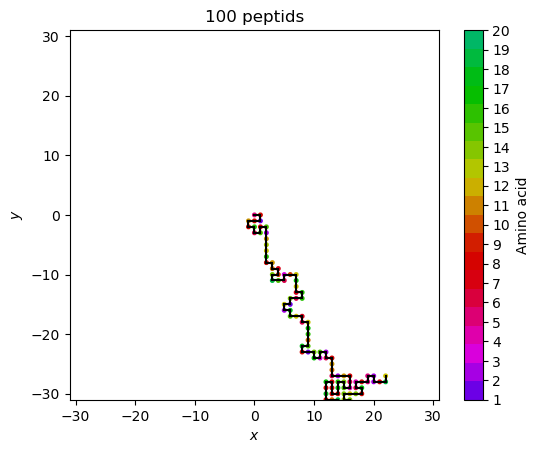

In [8]:
grid, coord_vec = randomwalk.self_avoiding_walk_protein(dim=100, steps=100)
while(coord_vec[-1].x == 0): # discard protein walks that got stuck
    grid, coord_vec = randomwalk.self_avoiding_walk_protein(dim=100, steps=100)
fig, ax = randomwalk.plot_protein(coord_vec, dim=30, path="")
fig.show()

Aufgabe 2:

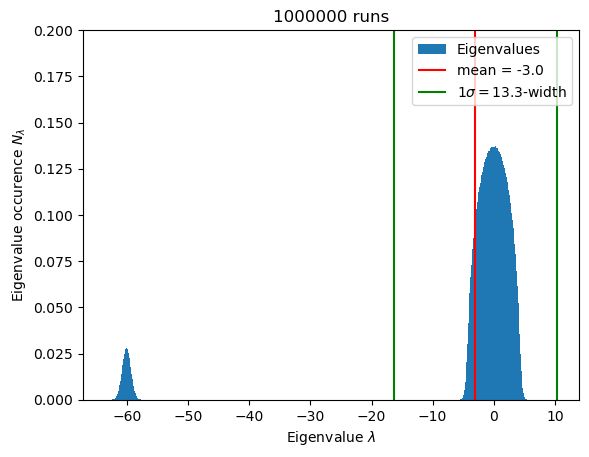

In [11]:
fig, ax, eigenvalues, ev_mean, ev_std = energy.eigenvalue_statistics(runs=1000000, path="")
fig.show()

Please put stuff here that we can present: